Let $Y=h(X,\theta)+E$, with $Y=\begin{pmatrix}y_{1} \\ \vdots \\  y_{m} \end{pmatrix}$ be our dependent variable and $X=(X_1,\dots,X_n)$ is a random variable where each $X_{i=1, \ldots , m}=\begin{pmatrix} 1 \\ x_{i1} \\ \vdots \\  x_{in} \end{pmatrix}$ represents our independent variables. 

In addition, $\theta = \begin{pmatrix}\theta_{0} \\ \vdots \\  \theta_{n} \end{pmatrix}$ is our parameter for the model function $h$ and $E = \begin{pmatrix}\epsilon_{1} \\ \vdots \\  \epsilon_{m} \end{pmatrix}$ is a vector of errors that our dependent variable $Y$ deviates from our model function $h$.   

Let's suppose know that our relationship between $Y$ and $X$ is linear with parameters $\theta_{i=0,\ldots,n}$. This can be translated as $h(X,\theta)=X^t\cdot\theta = \begin{pmatrix} 1 & x_{11} & \dots & x_{1n}\\ \vdots & \vdots & \ddots & \vdots \\ 1 & x_{m1} & \cdots & x_{mn} \end{pmatrix} \cdot \begin{pmatrix}\theta_{0} \\ \vdots \\  \theta_{n} \end{pmatrix}$. 

As a result, given our data points $\{ y_i, x_{i1},\ldots,x_{in}\}_{i=1}^{m}$ our relationship becomes $y_i=\theta_0+\theta_1\cdot x_{i1}+\cdots+\theta_n\cdot x_{in}+\epsilon_i$ with $i=1,\ldots,m$ and our goal is to try to determine this relationship.

Given our data for $Y,X$ we want to know the underline mechanism that our independent variables $X_{i=1,\ldots,n}$ produce the $Y$. In our case we will suppose that there is a linear relationship between $Y$ and $X$, so our goal is to calculate the $\theta_{i=0,\ldots,n}$ that determine the linear function. Before that , let's make some additional assuptions for our relationship and especially our errors.

1) Independence: The errors are independent and there is no correlation between consecutive errors

2) Homoscedasticity: The errors have constant variance

3) Normality: The errors are normally distributed

$\newline$

Now we are ready to start calculating the parameters $\theta_{i=0,\ldots,n}$ in order to reveal the relationship of $Y$ and $X$. Considering the fact that there will be a noise not revealing the real relationship between our data, we will try to determine our relationship by making predictions $\hat{y}_{i=1,\ldots,m}$ as close as we can to our $y_{i=1,\ldots,m}$.

In other words, we want to find a $ \dot{\theta}\in \mathbb{R}^n$ that 
$\dot{\theta} = \underset{{\theta\in \mathbb{R}^n}}{argmin} \Vert Y-X^t\cdot\theta\Vert^2
=\underset{{\theta\in \mathbb{R}^n}} {argmin}\{\frac{1}{m} \cdot \displaystyle\sum_{i=1}^{m}{(y_i-\theta_0-\theta_1 \cdot x_{i1}-\ldots -\theta_n \cdot x_{in})^2}\}
=\underset{{\theta\in \mathbb{R}^n}} {argmin}\{\frac{1}{m} \cdot \displaystyle\sum_{i=1}^{m}{(y_i-\hat{y_i})^2}\}$
$\newline$

Let $L(X,Y,\theta)=\Vert Y-X^t\cdot\theta\Vert^2= 
(Y-X^t\cdot\theta)^t\cdot(Y-X^t\cdot\theta)=
Y^tY-Y^tX^t\theta-\theta^tXY-\theta^tXX^t\theta$

So taking $\frac{\partial L}{\partial \theta}=0$, we have $\frac{\partial (Y^tY-Y^tX^t\theta-\theta^tXY+\theta^tXX^t\theta) }{\partial\theta}= -Y^tX^t-(XY)^t+\theta^t(XX^t+(XX^t)^t)= -2Y^tX^t+2\theta^tXX^t=0$. 
$\newline$
Hence $Y^tX^t=\theta^tXX^t \implies XY=XX^t\theta \implies \theta=(XX^t)^{-1}XY$.

In [1]:
import pandas as pd
import numpy as np

import random

import matplotlib.pyplot as plt




In [2]:
import numpy as np
import gzip
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import expit
import celluloid
from celluloid import Camera
from matplotlib import animation

import networkx as nx
from matplotlib.animation import FuncAnimation, PillowWriter 

In [3]:
pip install moviepy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install celluloid

Note: you may need to restart the kernel to use updated packages.


# Linear Regresion - Using OLS

In [5]:
n=100
x=[random.uniform(0,20) for i in range(n)]

y=np.array([[3*x[i]+1+random.gauss(0,4) for i in range(n)]]).T
x=np.array([[1 for i in range(n)],x]).T

theta=np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
theta

array([[0.58599813],
       [2.97516407]])

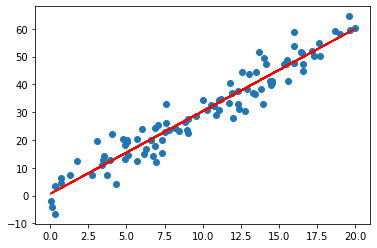

In [6]:
plt.scatter(x[:,1], y[:,0])

plt.plot(x[:,1], x.dot(theta),c='red')

plt.show()

In [21]:
n=100
X=np.random.uniform(0,20,(n,2))
#X=np.random.randn(n,2)*1+10
y=np.array([(-1)*X[:,0]+3*X[:,1]+1+np.random.normal(0, 4, n)]).T
X=np.insert(X,0,1,axis=1)


In [22]:

def LinearR_OLS(X,y):
    theta=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [23]:
theta=LinearR_OLS(X,y)
theta


array([[ 2.49141884],
       [-1.00905196],
       [ 2.89526147]])

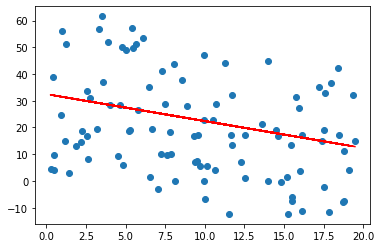

In [24]:
plt.scatter(X[:,1], y[:,0])

plt.plot(X[:,1], X[:,1]*theta[1]+theta[0]+30,c='red')

plt.show()

In [25]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

mesh_size = .02
margin = 0

data=pd.DataFrame(X)

data=data.iloc[:,1:]
data.rename(columns={1:'X_1',2:'X_2'},inplace=True)
data['y']=y
data

X = data[['X_1', 'X_2']]
y = data['y']

# Condition the model on sepal width and length, predict the petal width


model = LinearRegression()
model.fit(X, y)

# Create a mesh grid on which we will run our model
x_min, x_max = X.X_1.min() - margin, X.X_1.max() + margin
y_min, y_max = X.X_2.min() - margin, X.X_2.max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Run model
z=np.c_[xx.ravel(), yy.ravel()]
z=np.insert(z,0,1,axis=1)


pred=z.dot(theta)
pred = pred.reshape(xx.shape)

# Generate the plot
# fig = px.scatter_3d(data, x='X_1', y='X_2', z='y')
# fig.update_traces(marker=dict(size=5))
# fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred, name='pred_surface'))
# fig.show()

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()


In [28]:
model.fit(np.array(X).reshape(-2,2),y)

model.intercept_,model.coef_

(2.491418841874797, array([-1.00905196,  2.89526147]))

# Gradient Descent Algorithm

Gradient Descent Batch

In [15]:
n=10
x=[random.uniform(0,20) for i in range(n)]

y=np.array([[3*x[i]+1+random.gauss(0,4) for i in range(n)]]).T
x=np.array([[1 for i in range(n)],x]).T

theta=np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
theta

array([[2.49068724],
       [2.99661715]])

In [16]:

iter=10000
eta=0.0018
theta=np.array([[-10,20]]).T
#theta_list=[[theta[0][0],theta[1][0]]]
theta_0=[theta[0][0]]
theta_1=[theta[1][0]]


In [17]:
for i in range(iter):
    theta=theta-eta*(2/n)*x.T.dot(x.dot(theta)-y)
    theta_0.append(theta[0][0])
    theta_1.append(theta[1][0])
theta

array([[2.47110121],
       [2.99834821]])

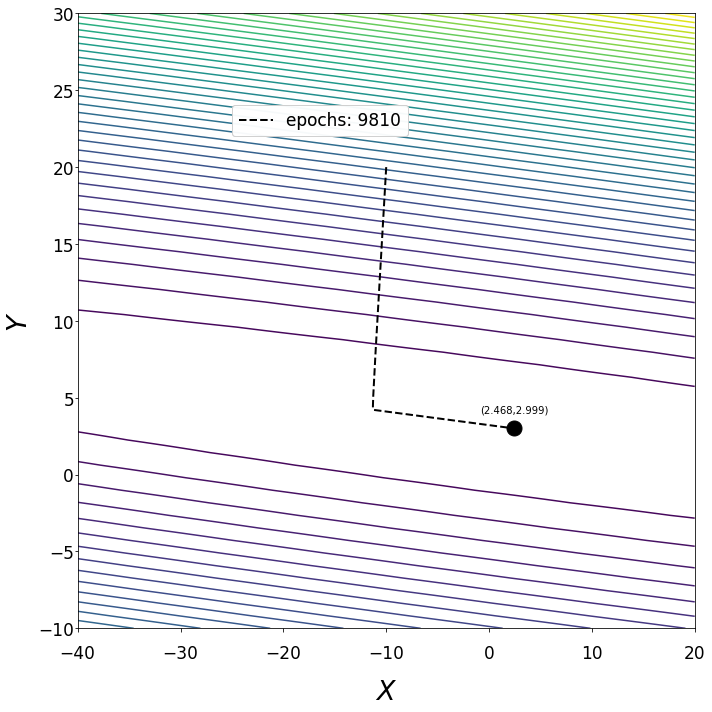

In [18]:
##Demoo 2D


fig = plt.figure(figsize=(10,10)) # create figure
ax = fig.add_subplot(111) 
line_style=["dashed", "dashdot", "dotted"] #linestyles
fontsize_=27 # set axis label fontsize
labelsize_=17 # set tick label fontsize
# ax.view_init(elev=30, azim=-10)
ax.set_xlabel(r'$X$', fontsize=fontsize_, labelpad=17)
ax.set_ylabel(r'$Y$', fontsize=fontsize_, labelpad=5)
# ax.set_zlabel("costs", fontsize=fontsize_, labelpad=-35)
ax.tick_params(axis="x", pad=12, which="major", labelsize=labelsize_)
ax.tick_params(axis="y", pad=0, which="major", labelsize=labelsize_)
# ax.tick_params(axis="z", pad=8, which="major", labelsize=labelsize_)
#ax.set_zlim(4.75,4.802) # set range for z-values in the plot
ax.set_xlim(-40,20)
ax.set_ylim(-10,30)


# Define which epochs to plot:
p1=list(np.arange(0,10,1))
p2=list(np.arange(10,10000,200))
points_=p1+p2

lst=[sum(x[:,1]**2),
sum(x[:,1]*y.ravel()),
sum(y.ravel()),
sum(x[:,1]),
sum(y.ravel()**2) ]

# def f(x, y):
#     return  (lst[0]*x** 2 + n*y**2-2*x*lst[1]-2*y*lst[2]+2*x*y*lst[3]+lst[4])*(1/n)
 
def f(x, y):
   return  (lst[0]*y** 2 + n*x**2-2*y*lst[1]-2*x*lst[2]+2*x*y*lst[3]+lst[4])*(1/n)
    
    
    
    
x_new = np.linspace(-40,20, 50)
y_new = np.linspace(-10,30, 50)
X, Y = np.meshgrid(x_new, y_new)
Z = f(X, Y)

# Z_10000=M1**2-M2**2



camera=Camera(fig) # create Camera object
for i in points_:
    # Plot the three trajectories of gradient descent...
    #... each starting from its respective starting point
    #... and each with a unique linestyle: 
    ax.plot(theta_0[0:i],theta_1[0:i],
                linestyle=line_style[0],linewidth=2,
                color="black", label=str(i))
    ax.scatter(theta_0[i],theta_1[i],
                   marker="o", s=15**2,
               color="black", alpha=1.0)
    
    # Surface plot (= loss landscape):
#     ax.plot_surface(M1, M2, Z_100, cmap='terrain', 
#                              antialiased=True,cstride=1,rstride=1, alpha=0.75)
    ax.legend([f'epochs: {i}'], loc=(0.25, 0.8),fontsize=17) # set position of legend
    plt.tight_layout() 
    
    ax.contour(X, Y, Z,50)
    #CS=ax.contour(X, Y, Z,50)
    

    ax.text(theta_0[i], theta_1[i]+1, '('+"%.3f" %theta_0[i] +"," +"%.3f" %theta_1[i]+')', ha="center")
    
    
    camera.snap() # take snapshot after each iteration
    
animation = camera.animate(interval = 5, # set delay between frames in milliseconds
                          repeat = False,
                          repeat_delay = 0)


animation.save('gd_2D.gif', writer="pillow", dpi=100 )  # save animation  

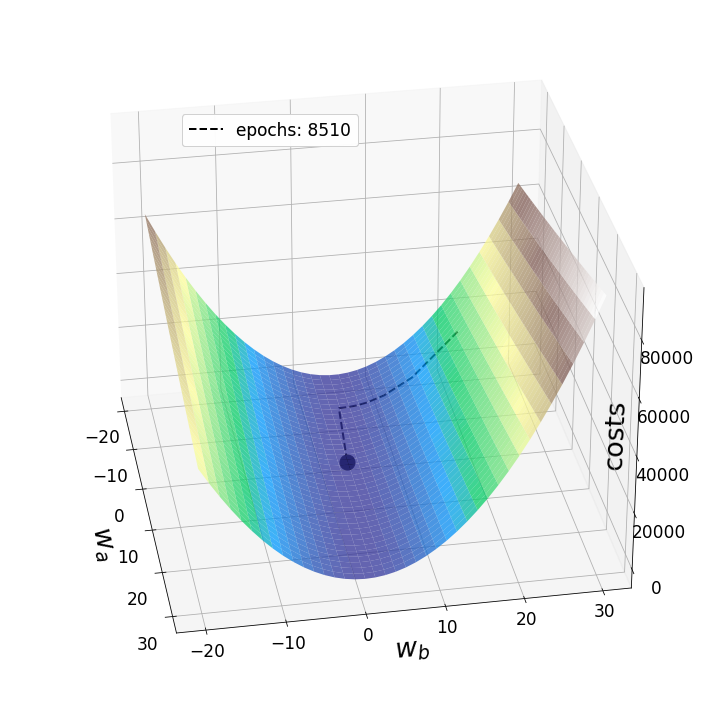

In [19]:
##### DEMO


lst=[sum(x[:,1]**2),
sum(x[:,1]*y.ravel()),
sum(y.ravel()),
sum(x[:,1]),
sum(y.ravel()**2) ]

fig = plt.figure(figsize=(10,10)) # create figure
ax = fig.add_subplot(111,projection='3d' ) 
line_style=["dashed", "dashdot", "dotted"] #linestyles
fontsize_=27 # set axis label fontsize
labelsize_=17 # set tick label fontsize
ax.view_init(elev=30, azim=-10)
ax.set_xlabel(r'$w_a$', fontsize=fontsize_, labelpad=17)
ax.set_ylabel(r'$w_b$', fontsize=fontsize_, labelpad=5)
ax.set_zlabel("costs", fontsize=fontsize_, labelpad=-35)
ax.tick_params(axis="x", pad=12, which="major", labelsize=labelsize_)
ax.tick_params(axis="y", pad=0, which="major", labelsize=labelsize_)
ax.tick_params(axis="z", pad=8, which="major", labelsize=labelsize_)
#ax.set_zlim(4.75,4.802) # set range for z-values in the plot

# Define which epochs to plot:
p1=list(np.arange(0,10,1))
p2=list(np.arange(10,9000,500))
points_=p1+p2

m1s = np.linspace(-20, 30, 40)   
m2s = np.linspace(-20, 30, 40)  
M1, M2 = np.meshgrid(m1s, m2s) # create meshgrid 

def f(x, y):
   return  (lst[0]*y** 2 + n*x**2-2*y*lst[1]-2*x*lst[2]+2*x*y*lst[3]+lst[4])*(1/n)


Z = f(M1, M2)



# x=np.linspace(-200, 300, 40) 
# y=np.linspace(-200, 300, 40) 
# z=np.random.randint(10000, size=40)

#ax.plot3D(20*np.cos(x),20*np.sin(x),z*0,color="red")


camera=Camera(fig) # create Camera object
for i in points_:
    # Plot the three trajectories of gradient descent...
    #... each starting from its respective starting point
    #... and each with a unique linestyle: 
    ax.plot(theta_0[0:i],theta_1[0:i],f(np.array(theta_0[0:i]), np.array(theta_1[0:i])),
                linestyle=line_style[0],linewidth=2,
                color="black", label=str(i))
    

    
    ax.scatter(theta_0[i],theta_1[i],f(np.array(theta_0[i]), np.array(theta_1[i])),
                   marker="o", s=15**2,
               color="black", alpha=1.0)
    

    # Surface plot (= loss landscape):
    ax.plot_surface(M1, M2, Z, cmap='terrain', 
                             antialiased=True,cstride=1,rstride=1, alpha=0.75)






    
    ax.legend([f'epochs: {i}'], loc=(0.25, 0.8),fontsize=17) # set position of legend
    plt.tight_layout() 
    camera.snap() # take snapshot after each iteration
    
animation = camera.animate(interval = 5, # set delay between frames in milliseconds
                          repeat = False,
                          repeat_delay = 0)


animation.save('gd_3D.gif', writer="pillow", dpi=100 )  # save animation  